In [1]:
import pandas as pd

Churn_data = pd.read_excel('C:/Users/Eswarakumar J/Downloads/Bank+Customer+Churn/Bank_Churn_Messy.xlsx')

Churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [2]:
Churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [3]:
Churn_data_1 = pd.read_excel('C:/Users/Eswarakumar J/Downloads/Bank+Customer+Churn/Bank_Churn_Messy.xlsx',sheet_name=1)

Churn_data_1.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [4]:
Churn_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrCard       10002 non-null  object
 4   Tenure          10002 non-null  int64 
 5   IsActiveMember  10002 non-null  object
 6   Exited          10002 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.1+ KB


In [5]:
churn_df = Churn_data.merge(Churn_data_1,how="left",on = "CustomerId")
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [9]:
churn_df = churn_df.drop("Tenure_y",axis=1).drop_duplicates()

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [13]:
churn_df = churn_df.rename({"Tenure_x":"Tenure"}, axis=1)

In [14]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [15]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,NumOfProducts,Exited
count,1.000000e+04,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.922077,5.012800,1.530200,0.203700
std,7.193619e+04,96.653299,10.489072,2.892174,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.000000


In [16]:
churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'].str.replace("€","").astype("float")

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


In [17]:
churn_df['Balance'] = churn_df['Balance'].str.replace("€","").astype("float")

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [18]:
churn_df[churn_df.isna().any(axis=1)==True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [20]:
churn_df = churn_df.fillna(value={"Surname":"Missing", "Age":churn_df["Age"].median()})


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited


In [24]:
churn_df.iloc[[28,121,9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,Missing,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,Missing,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,Missing,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [25]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,99762.195289,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,60583.863580,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [30]:
churn_df["EstimatedSalary"] = churn_df["EstimatedSalary"].replace(-999999, churn_df["EstimatedSalary"].median())

In [31]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,100092.252507,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [32]:
churn_df["Geography"].value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64

In [34]:
import numpy as np

churn_df["Geography"] = np.where(churn_df["Geography"].isin(["France","French","FRA"]),"France",churn_df["Geography"])

churn_df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Exited'>

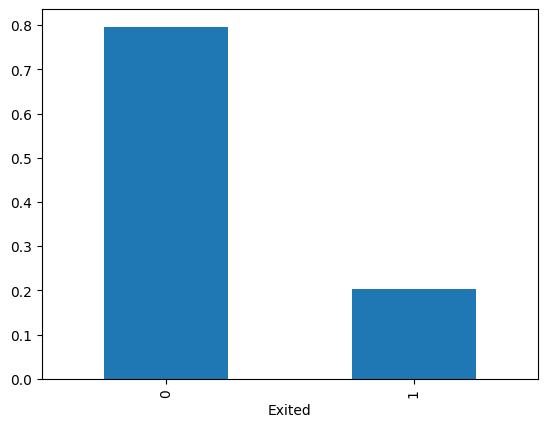

In [37]:
churn_df["Exited"].value_counts(normalize=True).plot.bar()

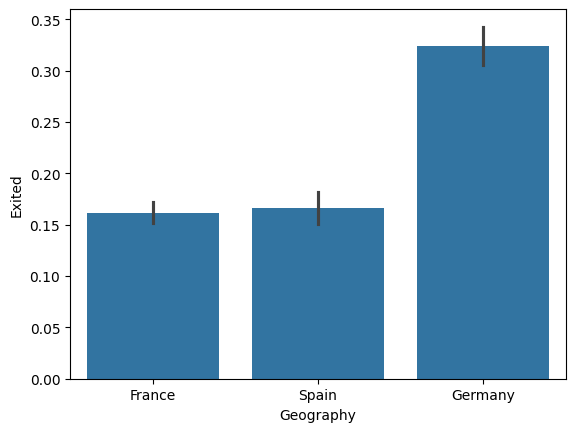

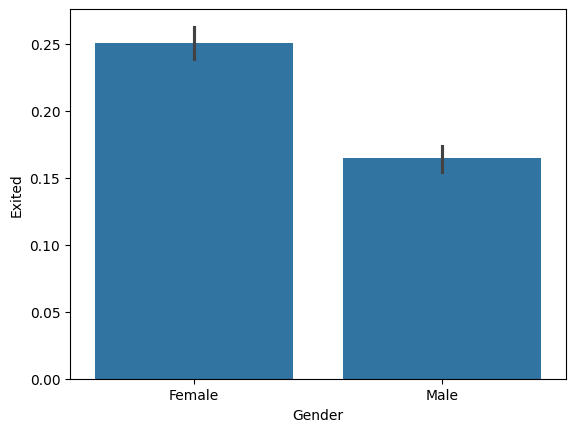

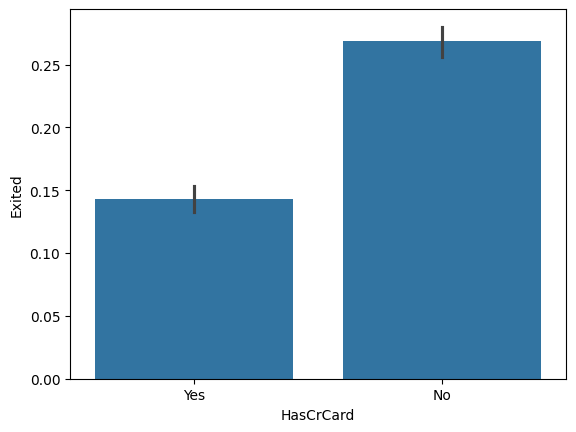

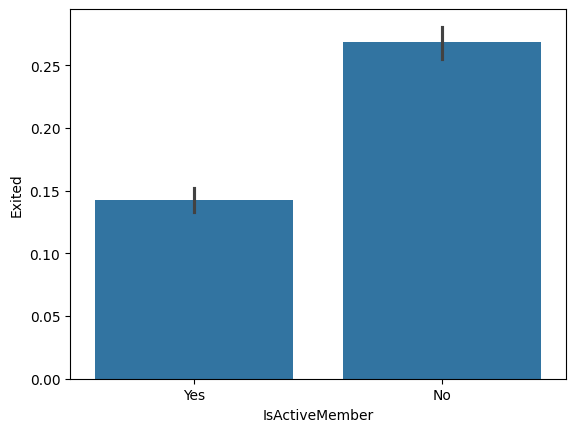

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in churn_df.drop("Surname",axis=1).select_dtypes("object"):
    sns.barplot(data = churn_df,x=col,y = "Exited")
    plt.show()
    

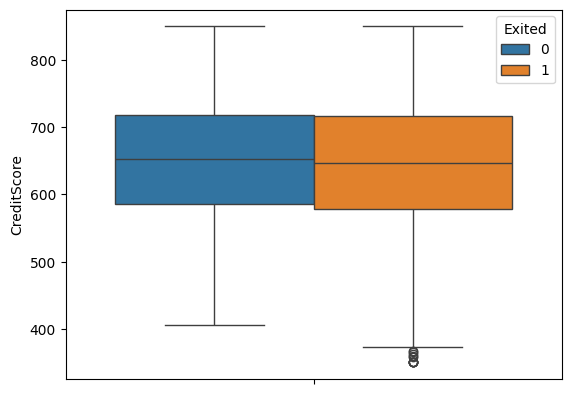

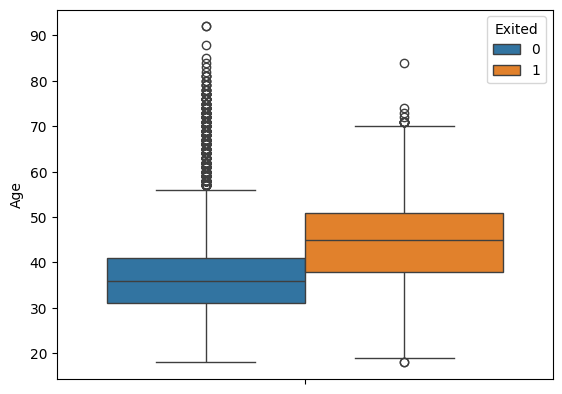

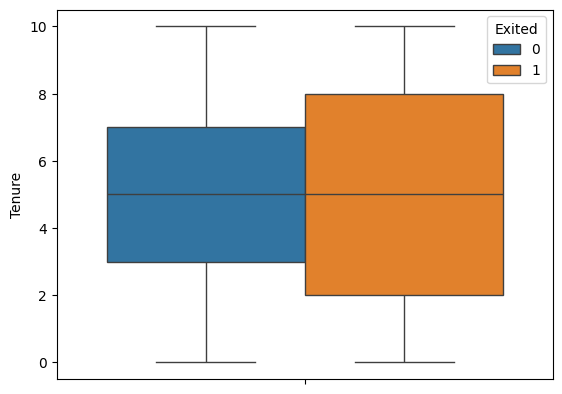

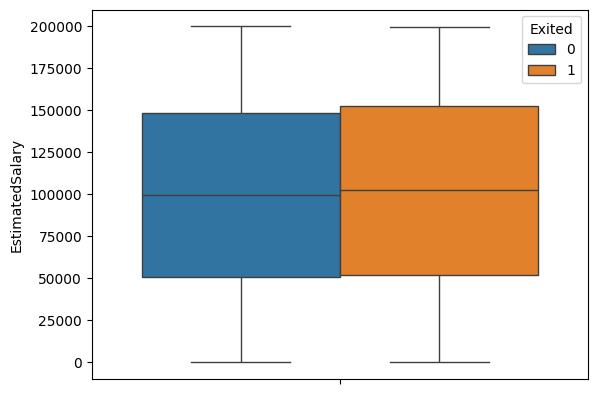

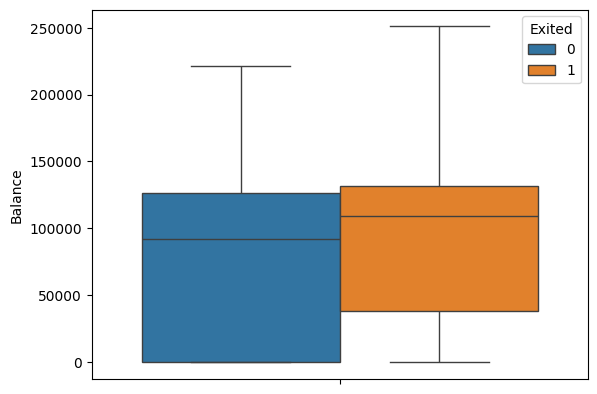

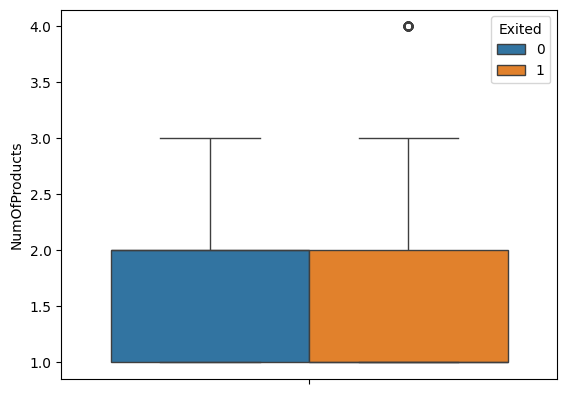

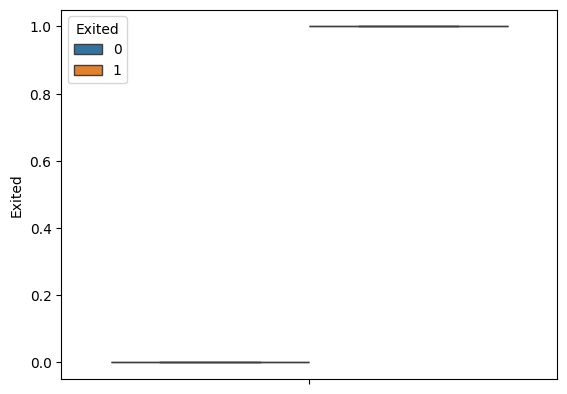

In [39]:
for col in churn_df.drop("CustomerId",axis=1).select_dtypes("number"):
    sns.boxplot(data = churn_df,y=col,hue= "Exited")
    plt.show()

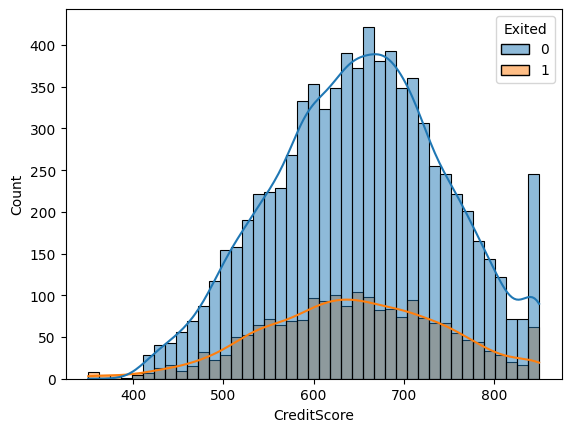

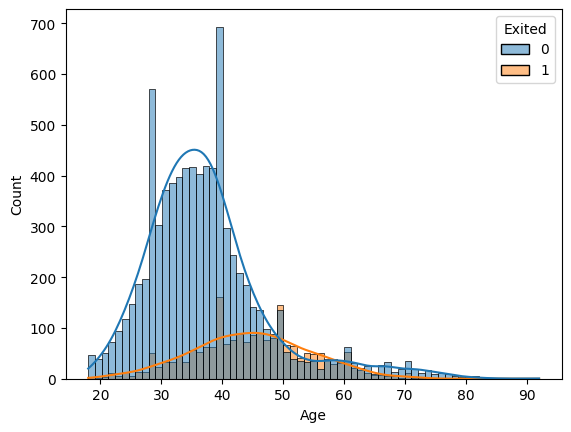

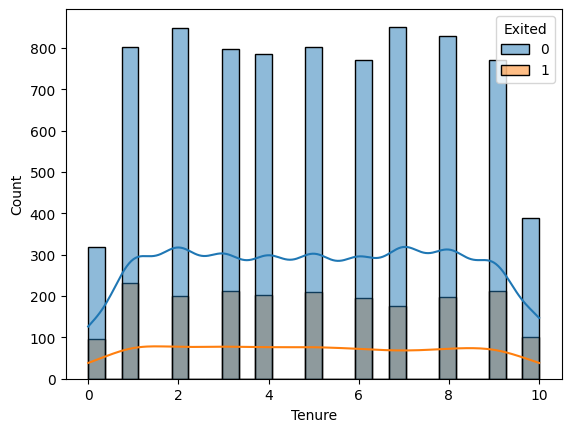

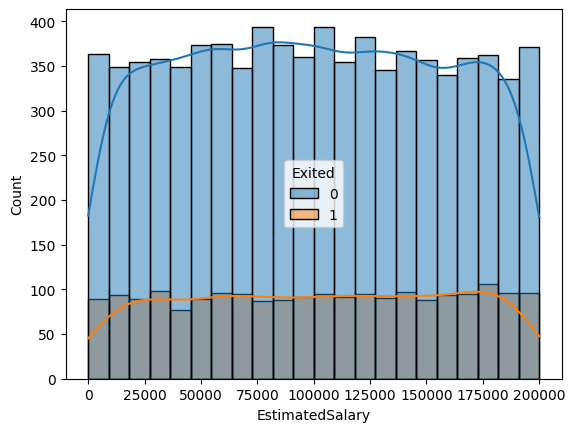

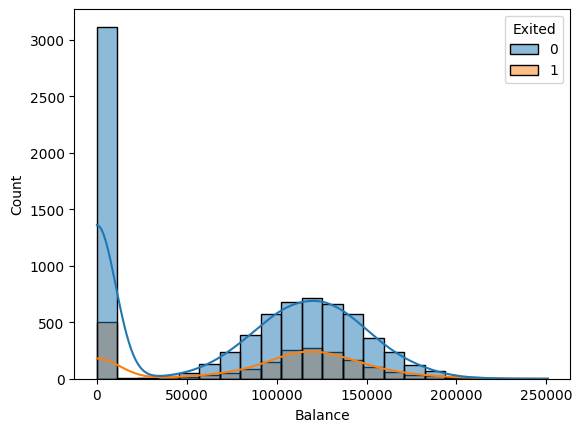

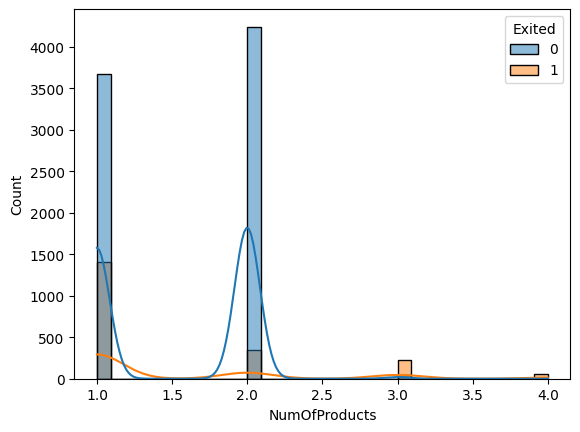

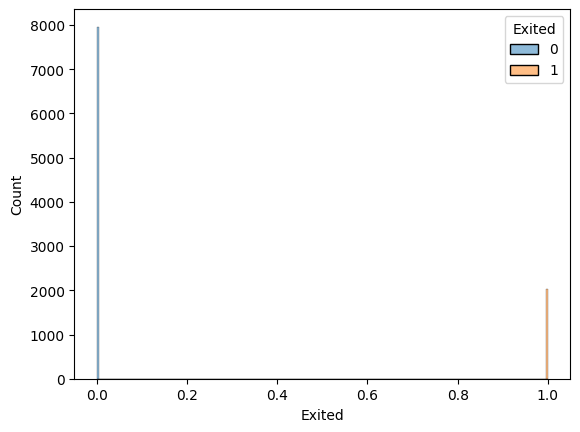

In [41]:
for col in churn_df.drop("CustomerId",axis=1).select_dtypes("number"):
    sns.histplot(data = churn_df,x=col,hue= "Exited",kde=True)
    plt.show()

In [42]:
modelling_df = churn_df.drop(["CustomerId","Surname"], axis = 1)

modelling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [43]:
modelling_df = pd.get_dummies(modelling_df,drop_first = True)

In [44]:
modelling_df ["Bal Vs Sal"] = modelling_df ["Balance"]/modelling_df ["EstimatedSalary"]

modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Bal Vs Sal
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False,1.401375
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True,1.587055


<Axes: ylabel='Bal_Vs_Sal'>

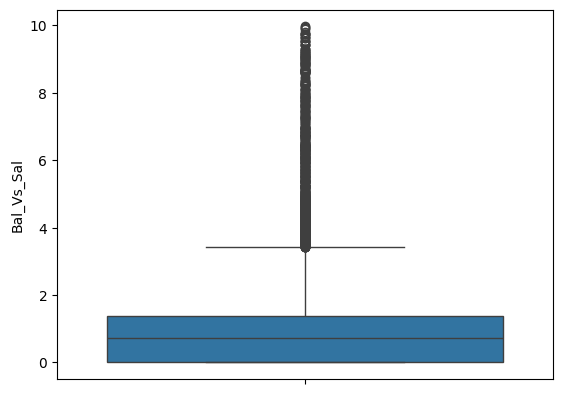

In [47]:
modelling_df.drop("Bal Vs Sal",axis=1)
modelling_df ["Bal_Vs_Sal"] = modelling_df ["Balance"]/modelling_df ["EstimatedSalary"]
sns.boxplot(data = modelling_df.query("Bal_Vs_Sal < 10"), y = "Bal_Vs_Sal")